In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
salary_data = pd.read_csv('Salary_Data.csv')
salary_data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


## Data Understanding

### Initial Analysis

In [3]:
salary_data.shape

(30, 2)

In [4]:
salary_data.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

In [5]:
salary_data.dtypes

YearsExperience    float64
Salary             float64
dtype: object

## Assumption Check

### Linearity Check

[]

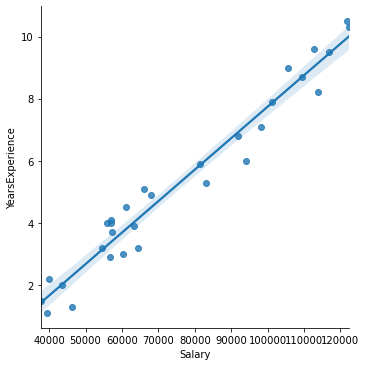

In [6]:
sns.lmplot(x='Salary',y='YearsExperience',data=salary_data)
plt.plot()

### Normality Check

[]

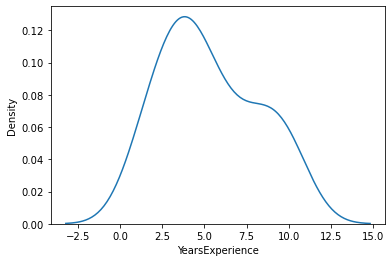

In [7]:
sns.distplot(a=salary_data['YearsExperience'],hist=False)
plt.plot()

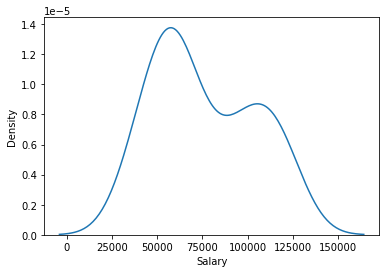

In [8]:
sns.distplot(a=salary_data['Salary'],hist=False)
plt.show()

In [9]:
salary_data.skew()

YearsExperience    0.37956
Salary             0.35412
dtype: float64

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

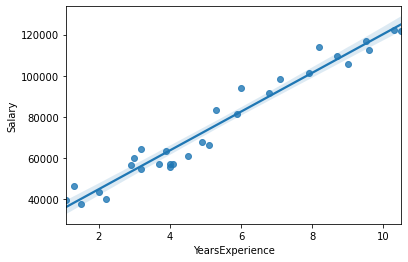

In [10]:
sns.regplot(x='YearsExperience',y='Salary',data=salary_data)

## Model Building

In [11]:
x=salary_data['YearsExperience']
y=salary_data['Salary']

In [12]:
import statsmodels.formula.api as smf

In [13]:
linear_model = smf.ols(formula='y~x',data=salary_data).fit()

In [14]:
linear_model.params

Intercept    25792.200199
x             9449.962321
dtype: float64

## Model Evaluation

In [15]:
y_pred = linear_model.predict(salary_data)

In [16]:
from sklearn.metrics import mean_squared_error,r2_score
print('mean squared error is ',mean_squared_error(y,y_pred))
print('r2 score is ',r2_score(y,y_pred))

mean squared error is  31270951.72228097
r2 score is  0.9569566641435086


### Taking Log Transformation

In [19]:
log_x = np.log(salary_data[['YearsExperience']])

<IPython.core.display.Javascript object>

In [20]:
frames = [log_x,y]
log_model = pd.concat(frames,axis=1)
log_model

,YearsExperience,Salary
0,0.095310,39343.0
1,0.262364,46205.0
2,0.405465,37731.0
3,0.693147,43525.0
4,0.788457,39891.0
5,1.064711,56642.0
6,1.098612,60150.0
7,1.163151,54445.0
8,1.163151,64445.0
9,1.308333,57189.0


In [21]:
Linear_model_1 = smf.ols(formula='y~log_x',data=log_model).fit()
Linear_model_1

In [22]:
Linear_model_1.params

Intercept    14927.97177
log_x        40581.98796
dtype: float64

In [23]:
y_pred_1 = Linear_model_1.predict(log_x)

In [24]:
from sklearn.metrics import mean_squared_error,r2_score
print('mean squared error is ',mean_squared_error(y,y_pred_1))
print('r2 score is ',r2_score(y,y_pred_1))

mean squared error is  106149618.72183882
r2 score is  0.8538888828756969


### Taking Sqrt Transformation

In [25]:
sqrt_x = np.sqrt(salary_data[['YearsExperience']])

<IPython.core.display.Javascript object>

In [26]:
frames = [sqrt_x,y]
sqrt_model = pd.concat(frames,axis=1)
sqrt_model

,YearsExperience,Salary
0,1.048809,39343.0
1,1.140175,46205.0
2,1.224745,37731.0
3,1.414214,43525.0
4,1.483240,39891.0
5,1.702939,56642.0
6,1.732051,60150.0
7,1.788854,54445.0
8,1.788854,64445.0
9,1.923538,57189.0


In [27]:
Linear_model_2 = smf.ols(formula='y~sqrt_x',data=log_model).fit()
Linear_model_2

In [28]:
Linear_model_2.params

Intercept   -16055.769117
sqrt_x       41500.680583
dtype: float64

In [29]:
y_pred_2 = Linear_model_2.predict(sqrt_x)

In [30]:
print('mean squared error is ',mean_squared_error(y,y_pred_2))
print('r2 score is ',r2_score(y,y_pred_2))

mean squared error is  50127755.61652501
r2 score is  0.9310009544993526


### Taking Square Transformation

In [31]:
square_x = np.sqrt(salary_data[['YearsExperience']])

<IPython.core.display.Javascript object>

In [32]:
frames = [square_x,y]
square_model = pd.concat(frames,axis=1)
square_model

,YearsExperience,Salary
0,1.048809,39343.0
1,1.140175,46205.0
2,1.224745,37731.0
3,1.414214,43525.0
4,1.483240,39891.0
5,1.702939,56642.0
6,1.732051,60150.0
7,1.788854,54445.0
8,1.788854,64445.0
9,1.923538,57189.0


In [33]:
Linear_model_3 = smf.ols(formula='y~sqrt_x',data=log_model).fit()
Linear_model_3

In [34]:
Linear_model_3.params

Intercept   -16055.769117
sqrt_x       41500.680583
dtype: float64

In [35]:
y_pred_3 = Linear_model_3.predict(sqrt_x)

In [36]:
print('mean squared error is ',mean_squared_error(y,y_pred_3))
print('r2 score is ',r2_score(y,y_pred_3))

mean squared error is  50127755.61652501
r2 score is  0.9310009544993526


### Inference
From the above Models, square root and square transformed model is better model than the original model